## HW Two - [Last Updated: February 2, 2023]

## $\color{blue}{\text{Problem One -- Computing G and C Content of Reads}}$

This problem is a continuation of Hands-On Six. You will need to use the code of  Problem One to be able to write and run the code of this problem. 

Recall that Problem One and Two of Hands-On Six we studied the reads that are contained in the file “SRR835775_1.first1000.fastq”. 
In this problem, we are interested in computing the GC content, in other words, the fraction of the reads (or genome) that contains G's or C's. It is a well-known fact that different species will have different GC contents. Here, we can use the GC content as a means of verifying that the read is authentic. So, we want to see, whether the composition of different bases is changing as we move along the read. We expect it will stay pretty even.

a) Write a program: GCcontent.py, that computes the probability of G’s and C’s across the positions of the reads and saves the result in a list: gc.

In [4]:
# GCcontent.py
def readFastq(filename):
    # Initialization
    sequences  = []     # list of sequences 
    phred33val = []     # list of phred33 encoded quality values
    
    with open(filename) as fh:            # fh stands for filehandle
        while fh:                      # keep reading entries until eof then break
            fh.readline()                 # skip "name" line
            seq = fh.readline().rstrip()  # read and save "base sequence" line
            fh.readline()                      # skip "placeholder" line
            qual = fh.readline().rstrip() # read and save "base quality" line
            if len(seq) == 0:          # have we hit the end of the file?
                break
            sequences.append(seq)          # add newly read sequence to list of sequences
            phred33val.append(qual)        # add newly read phred33 values to list of phred33val
    return sequences, phred33val

def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    # Initialization
    gc = [0] * 100      # list to keep track of number of G/C across the 100 positions of read
    totals = [0] * 100  # list to keep track of all bases at every position
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G': 
                gc[i] = gc[i]+1                     # increment gc array if i is g or c
            totals[i] = totals[i] + 1             # increment total (regardless of value of i)

            # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:                         # avoid dividing by zero
            gc[i] = gc[i] / float(totals[i])
    return gc

# main program
seqs, phred = readFastq("SRR835775_1.first1000.fastq")
gc = findGCByPos(seqs)
print(gc)

[0.486, 0.535, 0.574, 0.569, 0.58, 0.562, 0.557, 0.563, 0.562, 0.577, 0.582, 0.547, 0.531, 0.572, 0.548, 0.546, 0.566, 0.587, 0.546, 0.548, 0.578, 0.588, 0.601, 0.594, 0.534, 0.553, 0.553, 0.577, 0.626, 0.565, 0.539, 0.579, 0.558, 0.593, 0.59, 0.578, 0.579, 0.567, 0.561, 0.599, 0.591, 0.575, 0.546, 0.549, 0.574, 0.547, 0.566, 0.593, 0.553, 0.578, 0.566, 0.579, 0.596, 0.578, 0.606, 0.576, 0.551, 0.59, 0.554, 0.568, 0.575, 0.565, 0.597, 0.539, 0.584, 0.577, 0.549, 0.581, 0.598, 0.578, 0.564, 0.553, 0.571, 0.551, 0.575, 0.548, 0.591, 0.579, 0.571, 0.572, 0.558, 0.602, 0.578, 0.582, 0.548, 0.583, 0.542, 0.57, 0.601, 0.593, 0.551, 0.594, 0.543, 0.607, 0.572, 0.598, 0.598, 0.536, 0.593, 0.561]


b) Let us visualize the entries of the list: gc. Write a program: vis_gc.py, that takes the list gc and converts it to a curve. Use matplotlib to draw the curve.

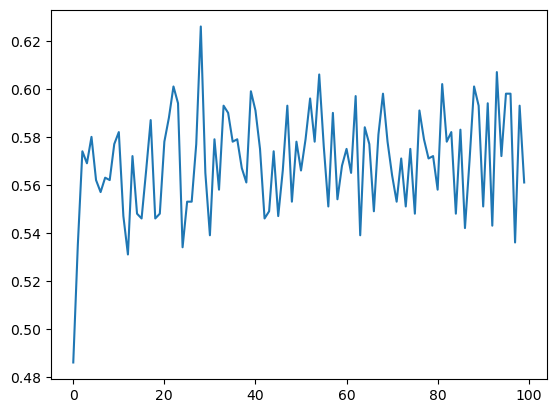

In [17]:
# vis_gc.py

import matplotlib.pyplot as plt
# produce static (not interactive) images of plots embedded in the notebook
%matplotlib inline

plt.plot(range(len(gc)),gc)
plt.show()

c) Is the distribution of GC pretty constant across all 100 positions? Explain.

d) Is the GC content across all 100 positions greater than 50% or less? Why do you think this might be the case? Hint: “SRR835775_1.first1000.fastq” is a file of human sequences.

e) Write a program overall_bases.py that computes the overall distribution of all four bases in all reads. Hint. Use the module: collection.

In [18]:
# overall_bases.py

import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


f) Examine more carefully the distribution of bases obtained in part e).  Did you expect such a distribution? Explain.

## $\color{blue}{\text{Problem Five -- Matching Real Reads}}$

In [23]:
### We will need naive_matching() From Hands-On Seven in this problem
#
# naive_matching.py
#
def naive(p, t):
    occurrences = []                       # list to keep track of the offsets of matches; i.e:
                                           #   list of indices where we have a match of p in t
    for i in range(len(t) - len(p) + 1):   # loop through text; i.e: 
                                           #   loop through all positions where p could start
        match = True                       # default: assume we have a match
        for j in range(len(p)):            # loop through the characters of the pattern; i.e:
                                           # j is the index of the "sliding window"
            if t[i+j] != p[j]:             # we found a mismatch between p[j] and the text; i.e:
                                           # .. jth elt of p is not equal to (i+j)th elt of t
                match = False              # .. so change value of match from True to False 
                break                      # .. and move out of the inner loop
                                           # .. since no need to continue searching/comparing
        if match:                          # if we successfully looped through the inner loop
            occurrences.append(i)          # .. then append the starting index of the pattern
    return occurrences

# main program
T = "water, water everywhere; nor any drop to drink; water, water everywhere; \
and all the boards did shrink"
P = "water"
print(P, 'is found in positions:', naive(P, T))

water is found in positions: [0, 7, 48, 55]


In [24]:
# We also need readingGenome.py from Hands-On Seven to save phix.txt in "genome"
# readingGenome.py
#
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

# main program
genome = readGenome('phix.txt')
# print("genome:\n", genome)

Unlike the Problem of Hands-On Six, the file “ERR266411_1.first1000.fastq” contains real reads that were obtained by sequencing a phi X virus (recall Problem One). The file is in FASTQ format.
Also recall that each entry has four parts and that the second (the sequence) 
and fourth (point-by-point phred33 scores) are the most important parts.
In this problem, we are only interested in the reads and not the quality scores.

a) Write a program: readingFastq2.py, similar to readingFastq.py, that extracts the sequence  of each entry and saves the sequences in a list "seqs". Note, here we need to perform a simple modification of the function readFastq( ) of Problem One [let us call it readFastq2( )] to account for the reads only and not the quality scores too. 

In [25]:
# readingFastq2.py
#

def readFastq2(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline()                 # skip name line
            seq = fh.readline().rstrip()     # read base sequence
            fh.readline()                 # skip placeholder line
            fh.readline()                 # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

# main program
seqs = readFastq2('ERR266411_1.first1000.fastq')
print(seqs)

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG', 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT', 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAAC

b) Write more code in readingFastq2.py to check and see how many reads will have an exact match in "genome".

In [26]:
# readingFastq2.py
#

def readFastq2(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

# main program
seqs = readFastq2('ERR266411_1.first1000.fastq')
# print(seqs)
#
# additional code to check and see how many reads will have an exact match in genome
numMatched = 0
n = 0
for r in seqs:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print(numMatched, '/', n, 'reads matched the genome exactly!')

7 / 1000 reads matched the genome exactly!


c) Did you expect to see such a low number of exact matches, especially when compared to the results of Problem One ii)? Can you explain the reason behind such a low number of exact hits?

Answer to c) The number of exact hits is surprisingly low. These are sequencing were reads actually from this genome, and yet very few actually match the genome. Some possible reasons include:

1) Sequencing Errors: some of the bases were read incorrectly by the sequencer. 

2) Differences with Reference Genome: there might be differences between the virus that was sequenced and the reference genome sequence. 

d) The number of exact matches with all 100 bases of each read is pretty low. Modify the program by considering the first 30 bases of each read. How many reads will have an exact match in genome in this case?

In [27]:
# readingFastq2.py
#

def readFastq2(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

# main program
seqs = readFastq2('ERR266411_1.first1000.fastq')
# print(seqs)
#
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in seqs:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print(numMatched, '/', n, '30-bases long reads matched the genome exactly!')

459 / 1000 30-bases long reads matched the genome exactly!


e) The number of exact matches with all 100 bases of each 30-bases long read is still far from 1000. Modify the program by considering the first 30 bases of each read in addition to trying to match the reverse complement of the read to the genome. That will cover the cases where the read comes from the other strand of the genome. How many reads will have an exact match in "genome" in this case?

In [30]:
# readingFastq2.py
#

# function takes a DNA string and returns its reverse complement
# we need to add 'N': 'N' to the dictionary since 'N' is part of reads
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def readFastq2(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

# main program
seqs = readFastq2('ERR266411_1.first1000.fastq')
# print(seqs)
#
# Try matching 30-bases long reads with their reverse complements to "genome"
numMatched = 0
n = 0
for r in seqs:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    # also try to match the reverse complement of the 30-bases long reads
    matches.extend(naive(reverseComplement(r), genome)) 
    n += 1
    if len(matches) > 0:
        numMatched += 1
print(numMatched, '/', n, '30-bases long reads and reverse complements matched the genome exactly!')

932 / 1000 30-bases long reads and reverse complements matched the genome exactly!
